In [143]:
import numpy as numpy
import pandas as pd

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [145]:
data=pd.read_excel('SulpakDatasets.xlsx')
data

,Name,opSystem,countSIMcard,display,ram,camera,fronfCamera,NFC,product_availability,newPrice
0,Смартфон Samsung Galaxy A73 8/256GB Green,Android,2,"6,7″ - 17,02 см",256,108 Mpx + 12 Mpx + 5 Mpx + 5 Mpx,32 Mpx,Да,На витрине,279 890
1,Смартфон Apple iPhone 14 Pro Max 6/256GB Gold,iOS 16,1,"6,7″ - 17,02 см",256,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,839 990
2,Смартфон Apple iPhone 14 Pro Max 6/128GB Silver,iOS 16,1,"6,7″ - 17,02 см",128,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,769 990
3,Смартфон Apple iPhone 14 Pro Max 6/256GB Space...,iOS 16,1,"6,7″ - 17,02 см",256,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,839 990
4,Смартфон Apple iPhone 11 64GB Black Slim Box,iOS 13,1,"6,1″ - 15,49 см",64,12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,279 990
...,...,...,...,...,...,...,...,...,...,...
676,Смартфон Motorola G52 6/128GB Glacier Blue,Android 12,2,"6,6″ - 16,76 см",128,50 Mpx + 8 Mpx + 2 Mpx,16 Mpx,Да,Есть в наличии,\n\n139 990
677,Смартфон Motorola Edge E30 Fusion 12/256GB Cos...,Android 12,2,"6,55″ - 16,64 см",256,50 Mpx + 13 Mpx,32 Mpx,Да,Есть в наличии,\n\n349 990
678,Смартфон Motorola G42 4/128GB Atlantic Green,Android 12,2,"6,5″ - 16,51 см",128,50 Mpx + 8 Mpx + 2 Mpx,16 Mpx,Да,Есть в наличии,\n\n119 990
679,Смартфон Motorola Edge E30 Ultra 12/256GB Star...,Android 12,2,"6,67″ - 16,94 см",256,200 Mpx + 50 Mpx + 12 Mpx,60 Mpx,Да,Есть в наличии,\n\n499 990


In [146]:
data["newPrice"]=data["newPrice"].apply(lambda x: x.replace(' ', '').replace('от', '')).astype('int')

In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [148]:
data.Name=le.fit_transform(data.Name)
data.opSystem=le.fit_transform(data.opSystem)
data.display=le.fit_transform(data.display)
data.camera=le.fit_transform(data.camera)
data.fronfCamera=le.fit_transform(data.fronfCamera)
data.NFC=le.fit_transform(data.NFC)
data.product_availability=le.fit_transform(data.product_availability)


In [149]:
data

,Name,opSystem,countSIMcard,display,ram,camera,fronfCamera,NFC,product_availability,newPrice
0,401,0,2,29,256,3,7,0,1,279890
1,168,31,1,29,256,26,2,0,0,839990
2,162,31,1,29,128,26,2,0,0,769990
3,170,31,1,29,256,26,2,0,0,839990
4,9,28,1,5,64,9,2,0,0,279990
...,...,...,...,...,...,...,...,...,...,...
676,257,3,2,24,128,53,5,0,0,139990
677,248,3,2,17,256,44,7,0,0,349990
678,254,3,2,22,128,53,5,0,0,119990
679,251,3,2,23,256,21,13,0,0,499990


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Name                  681 non-null    int32
 1   opSystem              681 non-null    int32
 2   countSIMcard          681 non-null    int64
 3   display               681 non-null    int32
 4   ram                   681 non-null    int64
 5   camera                681 non-null    int32
 6   fronfCamera           681 non-null    int32
 7   NFC                   681 non-null    int32
 8   product_availability  681 non-null    int32
 9   newPrice              681 non-null    int32
dtypes: int32(8), int64(2)
memory usage: 32.0 KB


In [151]:
data.describe()

,Name,opSystem,countSIMcard,display,ram,camera,fronfCamera,NFC,product_availability,newPrice
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,334.26,13.43,1.69,17.49,194.62,28.09,6.52,0.25,0.38,327136.50
std,194.26,11.79,0.46,9.59,184.51,20.28,5.00,0.43,0.73,261306.46
min,0.00,0.00,1.00,0.00,16.00,0.00,0.00,0.00,0.00,22392.00
25%,165.00,3.00,1.00,5.00,64.00,9.00,2.00,0.00,0.00,104990.00
50%,335.00,9.00,2.00,21.00,128.00,24.00,5.00,0.00,0.00,249990.00
75%,502.00,26.00,2.00,24.00,256.00,49.00,10.00,0.00,0.00,499990.00
max,670.00,32.00,2.00,33.00,1000.00,65.00,16.00,1.00,3.00,1119990.00


Data Visualization

In [152]:
# plt.scatter(data['camera'], data['newPrice'])

In [153]:
# sns.pairplot(data)

In [154]:
# data.to_excel('Sulpak.xlsx', index=False)

In [155]:
dataset=data.values
dataset

array([[   401,      0,      2, ...,      0,      1, 279890],
       [   168,     31,      1, ...,      0,      0, 839990],
       [   162,     31,      1, ...,      0,      0, 769990],
       ...,
       [   254,      3,      2, ...,      0,      0, 119990],
       [   251,      3,      2, ...,      0,      0, 499990],
       [   249,      3,      2, ...,      0,      0, 349990]], dtype=int64)

In [156]:
X=dataset[:,0:9]   #[0;9)
Y=dataset[:,9]  #9

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
min_max_scaler=MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
X_scale
 

array([[0.59850746, 0.        , 1.        , ..., 0.4375    , 0.        ,
        0.33333333],
       [0.25074627, 0.96875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.24179104, 0.96875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.37910448, 0.09375   , 1.        , ..., 0.3125    , 0.        ,
        0.        ],
       [0.37462687, 0.09375   , 1.        , ..., 0.8125    , 0.        ,
        0.        ],
       [0.37164179, 0.09375   , 1.        , ..., 0.4375    , 0.        ,
        0.        ]])

In [159]:
Y = Y.reshape(-1, 1)
Y

array([[ 279890],
       [ 839990],
       [ 769990],
       [ 839990],
       [ 279990],
       [ 319990],
       [ 319990],
       [ 279990],
       [ 159990],
       [  89990],
       [ 159990],
       [ 419990],
       [ 379990],
       [ 309990],
       [ 909990],
       [ 159990],
       [1049990],
       [ 909990],
       [ 909990],
       [ 909990],
       [ 769990],
       [ 769990],
       [ 769990],
       [ 769990],
       [ 699990],
       [ 699990],
       [ 699990],
       [ 789990],
       [ 789990],
       [ 789990],
       [ 789990],
       [ 649990],
       [ 649990],
       [ 579990],
       [ 579990],
       [ 579990],
       [ 709990],
       [ 709990],
       [ 569990],
       [ 569990],
       [ 569990],
       [ 569990],
       [ 499990],
       [ 499990],
       [ 499990],
       [ 839990],
       [ 839990],
       [ 769990],
       [ 979990],
       [1119990],
       [ 309990],
       [ 419990],
       [ 129790],
       [ 309990],
       [ 379990],
       [ 1

In [160]:
Y_scale=min_max_scaler.fit_transform(Y)
Y_scale

array([[0.23460138],
       [0.74489749],
       [0.68112187],
       [0.74489749],
       [0.23469248],
       [0.2711357 ],
       [0.2711357 ],
       [0.23469248],
       [0.12536284],
       [0.06158721],
       [0.12536284],
       [0.36224374],
       [0.32580052],
       [0.26202489],
       [0.80867312],
       [0.12536284],
       [0.93622437],
       [0.80867312],
       [0.80867312],
       [0.80867312],
       [0.68112187],
       [0.68112187],
       [0.68112187],
       [0.68112187],
       [0.61734624],
       [0.61734624],
       [0.61734624],
       [0.69934348],
       [0.69934348],
       [0.69934348],
       [0.69934348],
       [0.57179222],
       [0.57179222],
       [0.5080166 ],
       [0.5080166 ],
       [0.5080166 ],
       [0.62645705],
       [0.62645705],
       [0.49890579],
       [0.49890579],
       [0.49890579],
       [0.49890579],
       [0.43513017],
       [0.43513017],
       [0.43513017],
       [0.74489749],
       [0.74489749],
       [0.681

In [161]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(544, 9) (137, 9) (544, 1) (137, 1)


In [162]:
from sklearn.metrics import mean_squared_error, r2_score

In [163]:
model = linear_model.LinearRegression()

In [164]:
model.fit(x_train, y_train)

LinearRegression()

In [165]:
y_pred = model.predict(x_test)

In [166]:
print('Mean squared error (MSE): %.5f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 0.01228
Coefficient of determination (R^2): 0.75342


In [167]:
test=y_test[1:20]
pred=y_pred[1:20]

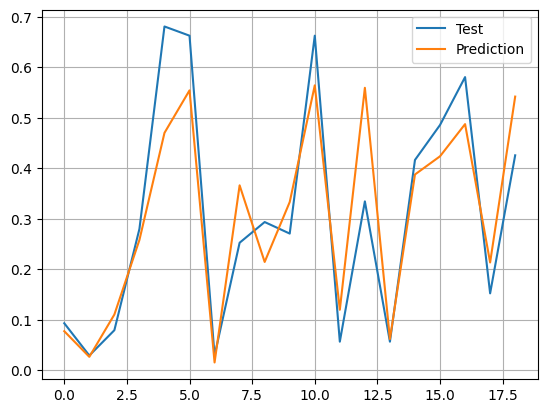

In [168]:
# test - массив тестовых значений, pred - массив прогнозных значений
plt.plot(test, label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [169]:
test = test.flatten()
pred = pred.flatten()

In [170]:
# test - массив тестовых значений, pred - массив прогнозных значений
df = pd.DataFrame({'Test': test, 'Prediction': pred})
pd.options.display.float_format = '{:.2f}'.format
print(df)

    Test  Prediction
0   0.09        0.08
1   0.03        0.03
2   0.08        0.11
3   0.28        0.26
4   0.68        0.47
5   0.66        0.55
6   0.03        0.02
7   0.25        0.37
8   0.29        0.21
9   0.27        0.33
10  0.66        0.56
11  0.06        0.12
12  0.33        0.56
13  0.06        0.06
14  0.42        0.39
15  0.49        0.42
16  0.58        0.49
17  0.15        0.21
18  0.43        0.54


In [171]:
min_val = numpy.min(Y)
max_val = numpy.max(Y)

In [172]:
test_denorm = test * (max_val - min_val) + min_val
pred_denorm = pred * (max_val - min_val) + min_val

In [173]:
df = pd.DataFrame({'Test': test_denorm, 'Prediction': pred_denorm})
pd.options.display.float_format = '{:.2f}'.format
print(df)

        Test  Prediction
0  124990.00   107741.86
1   54890.00    52022.15
2  109890.00   143974.30
3  329990.00   305989.12
4  769990.00   538723.07
5  749990.00   631154.81
6   54890.00    39763.96
7  299990.00   424762.43
8  344990.00   258231.10
9  319890.00   388458.54
10 749990.00   642029.37
11  84990.00   154327.15
12 389929.00   636737.12
13  84990.00    90768.45
14 479890.00   448335.40
15 555890.00   487873.04
16 659990.00   557790.56
17 189990.00   257152.58
18 489993.00   617607.98
